# **Movie Genre Identifier**

This NLP project focuses on predicting movie genres from their overviews. It preprocesses text through cleaning, stopword removal, and lemmatization to extract meaningful patterns. The project visualizes genre distributions using bar charts, word clouds, and Venn diagrams. Finally, it employs machine learning to classify movies into genres like Action, Comedy, and Drama, showcasing how NLP can be used for automated genre prediction.

Importing a Dataset from Hugging Face.
- Movie Descriptions Dataset hf://datasets/mt0rm0/movie_descriptors/




In [1]:
import pandas as pd

movie_dataset = pd.read_parquet("hf://datasets/mt0rm0/movie_descriptors/descriptors_data.parquet")
movie_dataset.head()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


,title,release_year,overview
0,Toy Story,1995,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,1995,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,1995,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,1995,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,1995,Just when George Banks has recovered from his ...


# Text Cleaning

In [3]:
# Lower case

movie_dataset['cleaned_overview'] = movie_dataset['overview'].apply(lambda x: x.lower())
movie_dataset.head()

,title,release_year,overview,cleaned_overview
0,Toy Story,1995,"Led by Woody, Andy's toys live happily in his ...","led by woody, andy's toys live happily in his ..."
1,Jumanji,1995,When siblings Judy and Peter discover an encha...,when siblings judy and peter discover an encha...
2,Grumpier Old Men,1995,A family wedding reignites the ancient feud be...,a family wedding reignites the ancient feud be...
3,Waiting to Exhale,1995,"Cheated on, mistreated and stepped on, the wom...","cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,1995,Just when George Banks has recovered from his ...,just when george banks has recovered from his ...


In [5]:
# Remove white spaces

from tqdm.notebook import tqdm

def remove_extra_whitespace(text):
    """Removes leading/trailing whitespace and replaces multiple spaces with single spaces."""
    text = text.strip()  # Remove leading/trailing whitespace
    text = " ".join(text.split())  # Replace multiple spaces with a single space
    return text

movie_dataset['cleaned_overview'] = [remove_extra_whitespace(overview) for overview in tqdm(movie_dataset['overview'], desc="Cleaning movie descriptions")]

# Preview the updated dataframe
movie_dataset[['overview', 'cleaned_overview']].head()


Cleaning movie descriptions:   0%|          | 0/44435 [00:00<?, ?it/s]

,overview,cleaned_overview
0,"Led by Woody, Andy's toys live happily in his ...","Led by Woody, Andy's toys live happily in his ..."
1,When siblings Judy and Peter discover an encha...,When siblings Judy and Peter discover an encha...
2,A family wedding reignites the ancient feud be...,A family wedding reignites the ancient feud be...
3,"Cheated on, mistreated and stepped on, the wom...","Cheated on, mistreated and stepped on, the wom..."
4,Just when George Banks has recovered from his ...,Just when George Banks has recovered from his ...


In [7]:
# Remove special characters

import re

def remove_special_characters(text):
    """Removes special characters from the text."""
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove any non-alphanumeric characters
    return text

movie_dataset['cleaned_overview'] = [remove_special_characters(overview) for overview in tqdm(movie_dataset['overview'], desc="Removing special characters")]

# Preview the updated dataframe
movie_dataset.head()

Removing special characters:   0%|          | 0/44435 [00:00<?, ?it/s]

,title,release_year,overview,cleaned_overview
0,Toy Story,1995,"Led by Woody, Andy's toys live happily in his ...",Led by Woody Andys toys live happily in his ro...
1,Jumanji,1995,When siblings Judy and Peter discover an encha...,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,1995,A family wedding reignites the ancient feud be...,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,1995,"Cheated on, mistreated and stepped on, the wom...",Cheated on mistreated and stepped on the women...
4,Father of the Bride Part II,1995,Just when George Banks has recovered from his ...,Just when George Banks has recovered from his ...


In [13]:
# remove HTML tags

from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

def remove_html_tags(text):
    """Removes HTML tags from the text."""
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

movie_dataset['cleaned_overview'] = [remove_html_tags(overview) for overview in tqdm(movie_dataset['overview'], desc="Removing HTML tags")]

movie_dataset.head()


Removing HTML tags:   0%|          | 0/44435 [00:00<?, ?it/s]

<ipython-input-13-855529fad191>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,title,release_year,overview,cleaned_overview,review
0,Toy Story,1995,"Led by Woody, Andy's toys live happily in his ...","Led by Woody, Andy's toys live happily in his ...","Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,1995,When siblings Judy and Peter discover an encha...,When siblings Judy and Peter discover an encha...,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,1995,A family wedding reignites the ancient feud be...,A family wedding reignites the ancient feud be...,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,1995,"Cheated on, mistreated and stepped on, the wom...","Cheated on, mistreated and stepped on, the wom...","Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,1995,Just when George Banks has recovered from his ...,Just when George Banks has recovered from his ...,Just when George Banks has recovered from his ...


In [14]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.7 MB/s eta 0:00:00


In [15]:
# Remove contractions

import contractions

def expand_contractions(text):
  """Expands contractions in the text."""
  return contractions.fix(text)

movie_dataset['cleaned_overview'] = [expand_contractions(overview) for overview in tqdm(movie_dataset['overview'], desc="Expanding contractions")]

movie_dataset.head

Expanding contractions:   0%|          | 0/44435 [00:00<?, ?it/s]

<bound method NDFrame.head of                              title  release_year  \
0                        Toy Story          1995   
1                          Jumanji          1995   
2                 Grumpier Old Men          1995   
3                Waiting to Exhale          1995   
4      Father of the Bride Part II          1995   
...                            ...           ...   
44430                   Robin Hood          1991   
44431          Century of Birthing          2011   
44432                     Betrayal          2003   
44433             Satan Triumphant          1917   
44434                     Queerama          2017   

                                                overview  \
0      Led by Woody, Andy's toys live happily in his ...   
1      When siblings Judy and Peter discover an encha...   
2      A family wedding reignites the ancient feud be...   
3      Cheated on, mistreated and stepped on, the wom...   
4      Just when George Banks has recovered from his ...   
...                                                  ...   
44430  Yet another version of the classic epic, with ...   
44431  An artist struggles to finish his work while a...   
44432  When one of her hits goes wrong, a professiona...   
44433  In a small town live two brothers, one a minis...   
44434  50 years after decriminalisation of homosexual...   

                                        cleaned_overview  \
0      Led by Woody, Andy's toys live happily in his ...   
1      When siblings Judy and Peter discover an encha...   
2      A family wedding reignites the ancient feud be...   
3      Cheated on, mistreated and stepped on, the wom...   
4      Just when George Banks has recovered from his ...   
...                                                  ...   
44430  Yet another version of the classic epic, with ...   
44431  An artist struggles to finish his work while a...   
44432  When one of her hits goes wrong, a professiona...   
44433  In a small town live two brothers, one a minis...   
44434  50 years after decriminalisation of homosexual...   

                                                  review  
0      Led by Woody, Andy's toys live happily in his ...  
1      When siblings Judy and Peter discover an encha...  
2      A family wedding reignites the ancient feud be...  
3      Cheated on, mistreated and stepped on, the wom...  
4      Just when George Banks has recovered from his ...  
...                                                  ...  
44430  Yet another version of the classic epic, with ...  
44431  An artist struggles to finish his work while a...  
44432  When one of her hits goes wrong, a professiona...  
44433  In a small town live two brothers, one a minis...  
44434  50 years after decriminalisation of homosexual...  

[44435 rows x 5 columns]>

In [16]:
# Removing Punctuation

import nltk
import string

nltk.download('punkt')
from nltk.tokenize import word_tokenize

def remove_punctuation(text):
  """Removes punctuation from a string."""
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

for overview in tqdm(movie_dataset['cleaned_overview'], desc="Removing punctuation"):
  overview = remove_punctuation(overview)

movie_dataset.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Removing punctuation:   0%|          | 0/44435 [00:00<?, ?it/s]

,title,release_year,overview,cleaned_overview,review
0,Toy Story,1995,"Led by Woody, Andy's toys live happily in his ...","Led by Woody, Andy's toys live happily in his ...","Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,1995,When siblings Judy and Peter discover an encha...,When siblings Judy and Peter discover an encha...,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,1995,A family wedding reignites the ancient feud be...,A family wedding reignites the ancient feud be...,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,1995,"Cheated on, mistreated and stepped on, the wom...","Cheated on, mistreated and stepped on, the wom...","Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,1995,Just when George Banks has recovered from his ...,Just when George Banks has recovered from his ...,Just when George Banks has recovered from his ...


In [17]:
# Remove Numbers

def remove_numbers(text):
  """Removes numbers from a string."""
  result = ''.join([i for i in text if not i.isdigit()])
  return result

movie_dataset['cleaned_overview'] = [remove_numbers(overview) for overview in tqdm(movie_dataset['overview'], desc="Removing numbers")]

movie_dataset.head()

Removing numbers:   0%|          | 0/44435 [00:00<?, ?it/s]

,title,release_year,overview,cleaned_overview,review
0,Toy Story,1995,"Led by Woody, Andy's toys live happily in his ...","Led by Woody, Andy's toys live happily in his ...","Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,1995,When siblings Judy and Peter discover an encha...,When siblings Judy and Peter discover an encha...,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,1995,A family wedding reignites the ancient feud be...,A family wedding reignites the ancient feud be...,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,1995,"Cheated on, mistreated and stepped on, the wom...","Cheated on, mistreated and stepped on, the wom...","Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,1995,Just when George Banks has recovered from his ...,Just when George Banks has recovered from his ...,Just when George Banks has recovered from his ...


In [23]:
# Remove stop words

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from tqdm.notebook import tqdm

nltk.download('stopwords')
nltk.download('punkt_tab')

def remove_stopwords(text):
    """Removes stopwords from a string."""
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]  # Remove stopwords
    return " ".join(filtered_sentence)  # Join the filtered words back into a string

movie_dataset['cleaned_overview'] = [remove_stopwords(overview) for overview in tqdm(movie_dataset['overview'], desc="Removing stopwords")]

movie_dataset.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Removing stopwords:   0%|          | 0/44435 [00:00<?, ?it/s]

,title,release_year,overview,cleaned_overview,review
0,Toy Story,1995,"Led by Woody, Andy's toys live happily in his ...","Led Woody , Andy 's toys live happily room And...","Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,1995,When siblings Judy and Peter discover an encha...,siblings Judy Peter discover enchanted board g...,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,1995,A family wedding reignites the ancient feud be...,family wedding reignites ancient feud next-doo...,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,1995,"Cheated on, mistreated and stepped on, the wom...","Cheated , mistreated stepped , women holding b...","Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,1995,Just when George Banks has recovered from his ...,"George Banks recovered daughter 's wedding , r...",Just when George Banks has recovered from his ...


In [27]:
# Lemmatization

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
  """Lemmatizes words in a string."""
  lemmatizer = WordNetLemmatizer()
  word_tokens = word_tokenize(text)
  lemmatized_sentence = [lemmatizer.lemmatize(w) for w in word_tokens]
  return " ".join(lemmatized_sentence)

movie_dataset['cleaned_overview'] = [lemmatize_text(overview) for overview in tqdm(movie_dataset['overview'], desc="Lemmatizing")]

movie_dataset.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatizing:   0%|          | 0/44435 [00:00<?, ?it/s]

,title,release_year,overview,cleaned_overview,review
0,Toy Story,1995,"Led by Woody, Andy's toys live happily in his ...","Led by Woody , Andy 's toy live happily in his...","Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,1995,When siblings Judy and Peter discover an encha...,When sibling Judy and Peter discover an enchan...,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,1995,A family wedding reignites the ancient feud be...,A family wedding reignites the ancient feud be...,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,1995,"Cheated on, mistreated and stepped on, the wom...","Cheated on , mistreated and stepped on , the w...","Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,1995,Just when George Banks has recovered from his ...,Just when George Banks ha recovered from his d...,Just when George Banks has recovered from his ...


# Genre Assignment

In [28]:
genres = ['Drama', 'Comedy', 'Science Fiction', 'Fantasy', 'Horror', 'Thriller', 'Western', 'Musical']

# Assigns genres based on keywords
def assign_genre(text):
    # Drama
    if 'love' in text or 'sad' in text or 'family' in text or 'relationship' in text:
        return 'Drama'
    # Comedy
    elif 'laugh' in text or 'funny' in text or 'humor' in text or 'comedy' in text:
        return 'Comedy'
    # Science Fiction
    elif 'space' in text or 'alien' in text or 'future' in text or 'robot' in text or 'technology' in text:
        return 'Science Fiction'
    # Fantasy
    elif 'magic' in text or 'wizard' in text or 'dragon' in text or 'fantasy' in text or 'fairy' in text:
        return 'Fantasy'
    # Horror
    elif 'ghost' in text or 'blood' in text or 'horror' in text or 'scary' in text or 'haunted' in text:
        return 'Horror'
    # Thriller
    elif 'mystery' in text or 'thriller' in text or 'suspense' in text or 'crime' in text or 'detective' in text:
        return 'Thriller'
    # Western
    elif 'cowboy' in text or 'western' in text or 'desert' in text or 'gunslinger' in text:
        return 'Western'
    # Musical
    elif 'music' in text or 'song' in text or 'dance' in text or 'musical' in text:
        return 'Musical'
    else:
        return 'Unknown'


movie_dataset['genre'] = movie_dataset['cleaned_overview'].apply(assign_genre)

movie_dataset[['cleaned_overview', 'genre']].head()


,cleaned_overview,genre
0,"Led by Woody , Andy 's toy live happily in his...",Unknown
1,When sibling Judy and Peter discover an enchan...,Fantasy
2,A family wedding reignites the ancient feud be...,Drama
3,"Cheated on , mistreated and stepped on , the w...",Drama
4,Just when George Banks ha recovered from his d...,Unknown


# Display of the results

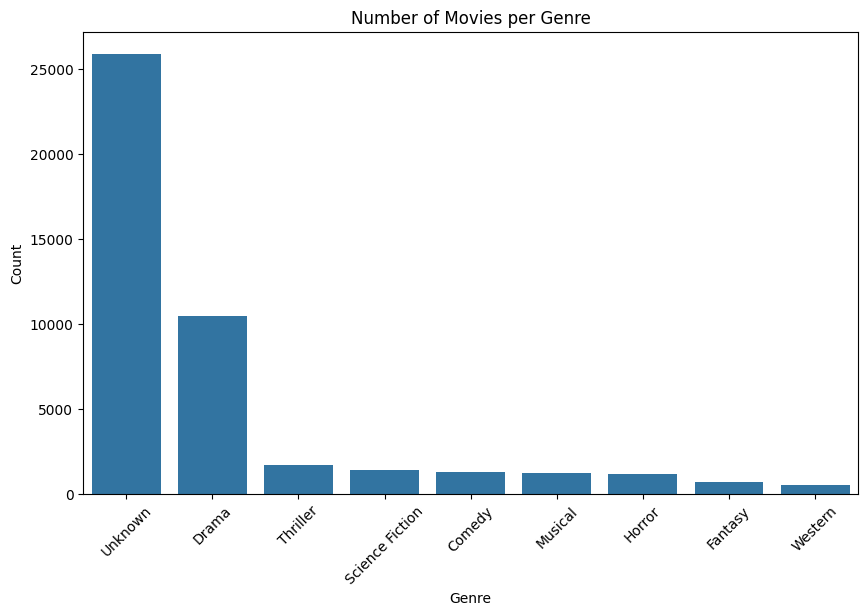

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot genre distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=movie_dataset, order=movie_dataset['genre'].value_counts().index)
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


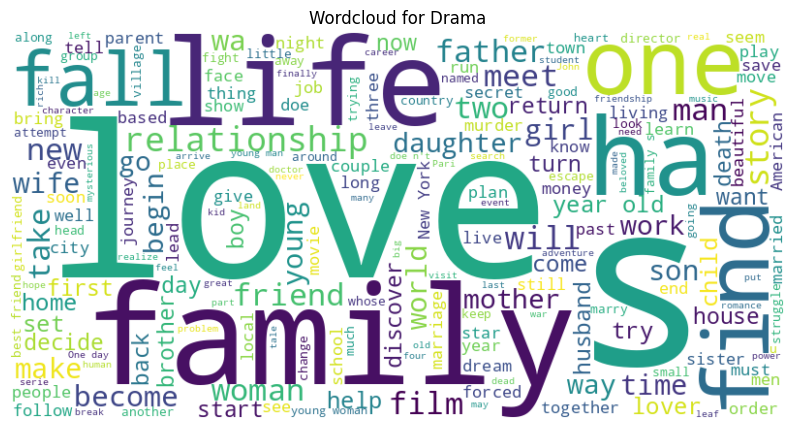

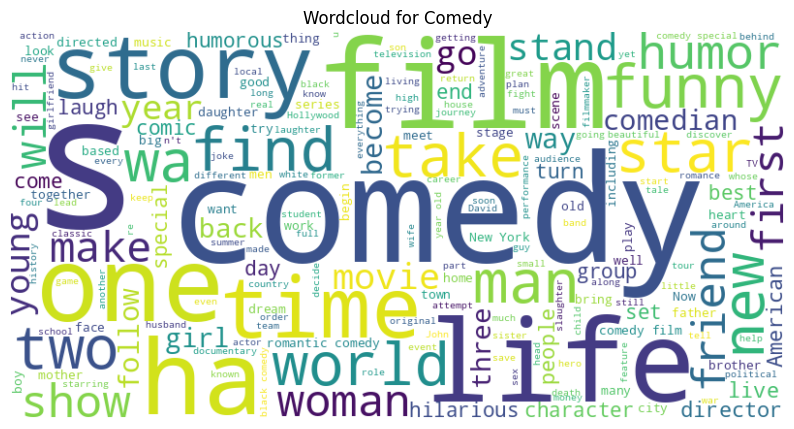

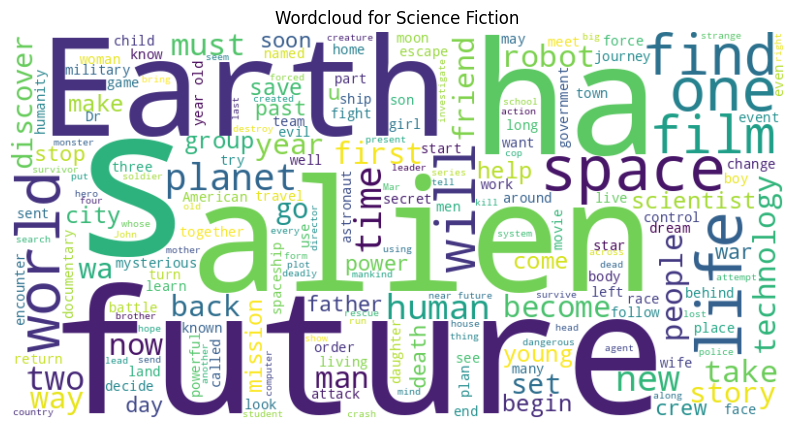

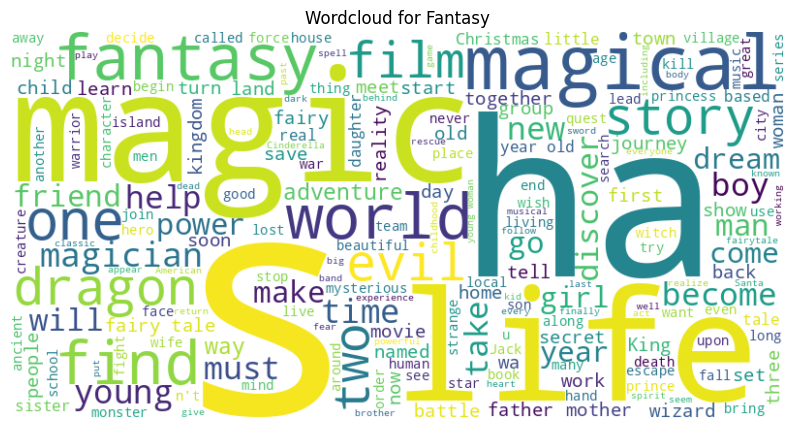

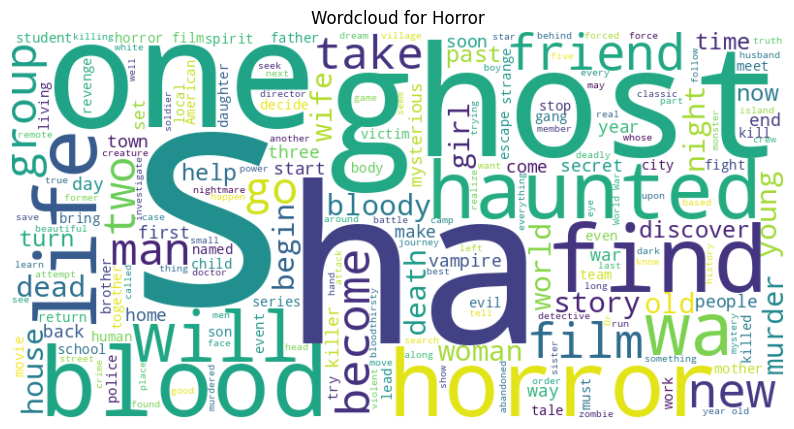

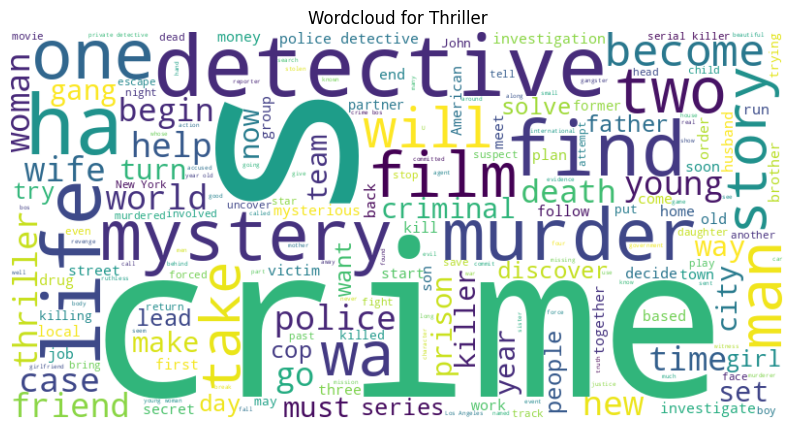

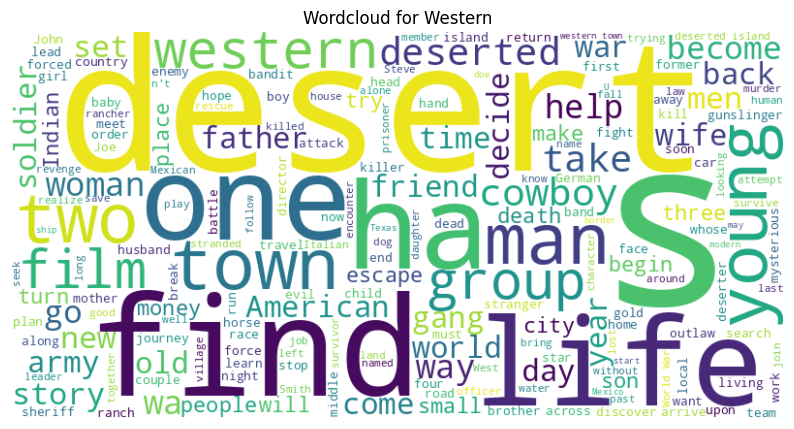

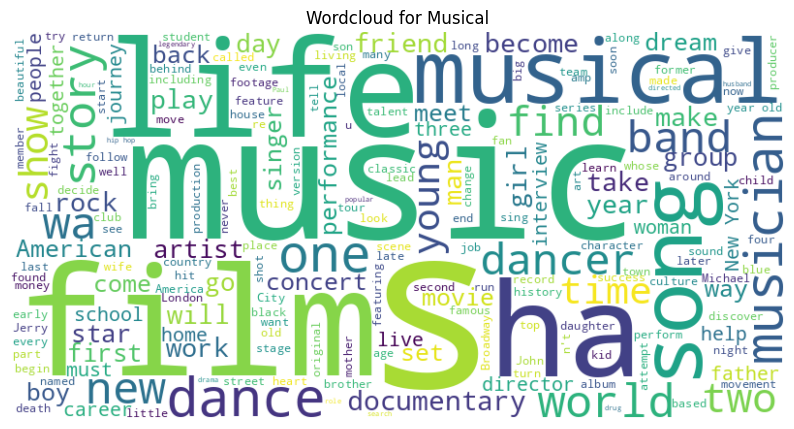

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the genres you are using
genres = ['Drama', 'Comedy', 'Science Fiction', 'Fantasy', 'Horror', 'Thriller', 'Western', 'Musical']

# Generate word cloud for each genre
for genre in genres:
    # Get all cleaned overviews for the specific genre
    text = ' '.join(movie_dataset[movie_dataset['genre'] == genre]['cleaned_overview'])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud for {genre}')
    plt.show()


# Model Training and Evaluation

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Vectorize the cleaned text (using the cleaned_overview column)
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(movie_dataset['cleaned_overview'])

y = movie_dataset['genre']

# Split into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))  # Precision, recall, F1-score for each class
print(confusion_matrix(y_test, y_pred))  # Confusion matrix to see how well the model performed


                 precision    recall  f1-score   support

         Comedy       0.90      0.70      0.79       249
          Drama       0.98      0.95      0.96      2160
        Fantasy       0.89      0.47      0.62       137
         Horror       0.88      0.70      0.78       251
        Musical       0.88      0.74      0.80       248
Science Fiction       0.95      0.79      0.86       287
       Thriller       0.85      0.92      0.88       317
        Unknown       0.92      0.98      0.95      5137
        Western       0.79      0.46      0.58       101

       accuracy                           0.93      8887
      macro avg       0.89      0.75      0.80      8887
   weighted avg       0.93      0.93      0.92      8887

[[ 175    4    2    2    6    2    3   54    1]
 [   6 2042    2    4    5    4    9   86    2]
 [   0    3   65    4    4    1    3   57    0]
 [   0    1    0  175    0    0   13   62    0]
 [   1    5    0    0  184    0    0   58    0]
 [   0    2    1